# ANALISIS DEL PDF #
Se analiza la metadata del PDF buscando pista de falsificación o modificación del documento

In [ ]:
!pip install PyPDF2
!pip install fitz
!pip install --ignore-installed pymupdf==1.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 41.0 MB/s eta 0:00:00


Hay varias pista que arroja la metadata: \
*Analizar la fecha de creacion y modificación las cuales deben ser iguales. \
*En algunos casos el creador, autor o productor ya estan definidos por lo tanto se puede revisar esa info y comparar. \
*El ID viene encriptado, y si se modifica se generan 2 IDs diferentes.

In [ ]:
from PyPDF2 import PdfReader
import fitz
pt ="/content/pdfs/1 (2).pdf"
doc1 = fitz.open(pt)
reader = PdfReader(pt)

meta = reader.metadata

print("NUMERO DE PAGINAS: ",len(reader.pages))

# All of the following could be None!
print("AUTOR: ",meta.author)
print("CREADOR: ",meta.creator)
print("PRODUCTOR: ",meta.producer)
print("TEMA: ",meta.subject)
try:
  print("FECHA DE CREACION: ",meta.creation_date)
except:
  print("NO TIENE FECHA DE CREACIÓN")
try:
  print("FECHA DE MODIFICACION: ",meta.modification_date)
except:
  print("NO TIENE FECHA DE MODIFICACIÓN")
print("ALL VALUES: ",meta.values())

print(doc1.pdf_trailer())# si el ID de la derecha es diferente al de la izquierda es porque fué modofocado.

NUMERO DE PAGINAS:  1
AUTOR:  CamScanner
CREADOR:  None
PRODUCTOR:  intsig.com pdf producer
TEMA:  autorización cita cx de columna
FECHA DE CREACION:  None
NO TIENE FECHA DE MODIFICACIÓN
ALL VALUES:  dict_values(['intsig.com pdf producer', 'autorización cita cx de columna', 'CamScanner', 'autorización cita cx de columna', '', ''])
<<
  /Root 1 0 R
  /Info 3 0 R
  /Size 11
>>


Aqui se convierte el PDF a imagen

In [ ]:
import fitz
from typing import Tuple
import os

def convert_pdf2img(input_file: str, pages: Tuple = None):
    if input_file=="/content/pdfs/.ipynb_checkpoints":
      pass
    else:
      """Converts pdf to image and generates a file by page"""
      # Open the document
      print("W",input_file)
      pdfIn = fitz.open(input_file)
      output_files = []
      # Iterate throughout the pages
      for pg in range(pdfIn.pageCount):
          if str(pages) != str(None):
              if str(pg) not in str(pages):
                  continue
          # Select a page
          page = pdfIn[pg]
          print(pg)
          if pg == 0:
            rotate = int(0)
            # PDF Page is converted into a whole picture 1056*816 and then for each picture a screenshot is taken.
            # zoom = 1.33333333 -----> Image size = 1056*816
            # zoom = 2 ---> 2 * Default Resolution (text is clear, image text is hard to read)    = filesize small / Image size = 1584*1224
            # zoom = 4 ---> 4 * Default Resolution (text is clear, image text is barely readable) = filesize large
            # zoom = 8 ---> 8 * Default Resolution (text is clear, image text is readable) = filesize large
            zoom_x = 1
            zoom_y = 1
            # The zoom factor is equal to 2 in order to make text clear
            # Pre-rotate is to rotate if needed.
            mat = fitz.Matrix(zoom_x, zoom_y).preRotate(rotate)
            pix = page.getPixmap(matrix=mat, alpha=False)
            output_file = f"{os.path.splitext(os.path.basename(input_file))[0]}_page{pg+1}.png"
            pix.writePNG('/content/'+output_file)
            output_files.append(output_file)
      pdfIn.close()
      summary = {
          "File": input_file, "Pages": str(pages), "Output File(s)": str(output_files)
      }
      # Printing Summary
      print("## Summary ########################################################")
      print("\n".join("{}:{}".format(i, j) for i, j in summary.items()))
      print("###################################################################")
      return output_files

files = os.listdir('/content/pdfs') #ruta a la carpeta de los pdfs
root = '/content/pdfs/'
for i in files:
  convert_pdf2img(root+i)

W /content/pdfs/1 (2).pdf
0
## Summary ########################################################
File:/content/pdfs/1 (2).pdf
Pages:None
Output File(s):['1 (2)_page1.png']
###################################################################


In [ ]:
import numpy as np

doc=fitz.open(pt)
page=doc[0]
blocks = page.get_text("dict", flags=0)["blocks"]
spans=[]
fonts = []

for b in blocks:
  for l in b["lines"]:
    for s in l["spans"]:
      fonts.append(s['font'])
      spans.append((s["bbox"], s["text"]))
cant_fonts = dict(zip(fonts,map(lambda x: fonts.count(x),fonts)))

print(cant_fonts)
sortedFonts = dict(sorted(cant_fonts.items(), key=lambda x:x[1],reverse=True))
print(sortedFonts)
su = int((np.sum(list(sortedFonts.values())))*0.1)
j=0
sf = sortedFonts.copy()
for i in sortedFonts.values():
  print(i,su)
  if i < su:
    k,v=sf.popitem()
  j=j+1
print(sf)
bad_font = []
for b in blocks:
  for l in b["lines"]:
    for s in l["spans"]:
      for fn in sf:
        ky =(sf.get(s['font'],False))
        if ky:
          pass
        else:
          bad_font.append((s["bbox"], s["text"]))
          break
print(bad_font)
import json
out=open("spans.json", "w")
out.write(json.dumps(spans))
out.close()

{}
{}
{}
[]


Se pude detectar si fué modificado analizando las fuentes del documento

/content/1 (2)_page1.png
NO TIENE METADATA


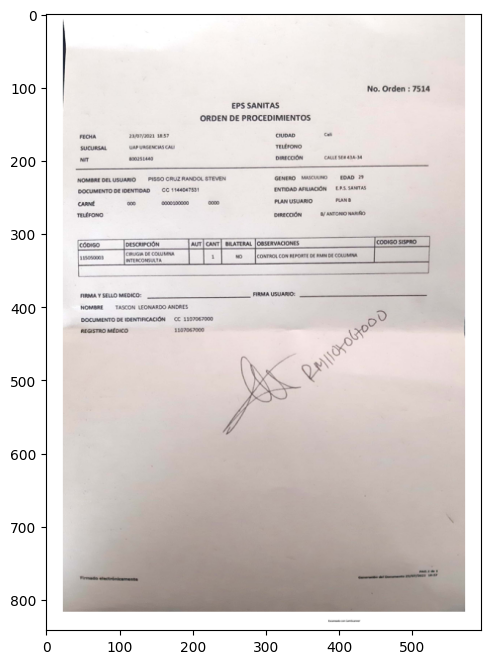

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 =  cv2.imread('/content'+'{}_page1.png'.format(pt[13:-4]))
print('/content'+'{}_page1.png'.format(pt[13:-4]))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = img1.copy()
rois =[]
#img1 = cv2.imread('/content/valida_test_3_page-0001.jpg')
#img1 = cv2.resize(img1, (600,840))
with open ('/content/spans.json', 'r') as f:
  data = f.read()
if spans != []:
  for u in spans:
    if len(u[1].split()) != 0 and u[0][0] > 0:
      roi = img1[int(u[0][1]+((u[0][3]-u[0][1])/8)):int(u[0][3])-int((u[0][3]-u[0][1])/8)  , int(u[0][0]):int(u[0][2])] #-int((u[0][3]-u[0][1])/4)
      for bf2 in bad_font:
        if u == bf2:
          print("BAD FONT DETECTED")
          cv2.rectangle(img1, (int(u[0][0]), int(u[0][1])), (int(u[0][2]) , int(u[0][3])), (255,0,0), 1)
      rois.append([roi, u])

else:
  print("NO TIENE METADATA")
plt.figure(figsize = (8,8))
plt.imshow(img1)
plt.show()

Se analiza si hay texto oculto

1631.0 (8, 234, 3)


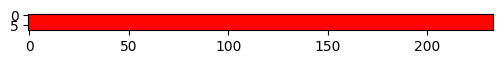

1981.0 (8, 284, 3)


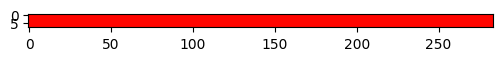

1799.0 (8, 258, 3)


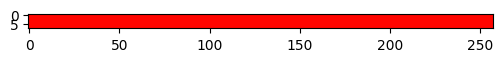

1953.0 (8, 280, 3)


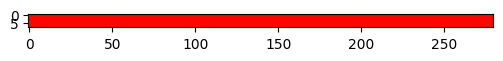

1638.0 (8, 235, 3)


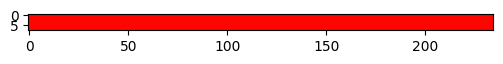

2107.0 (8, 302, 3)


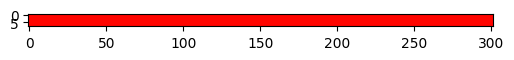

WARNING


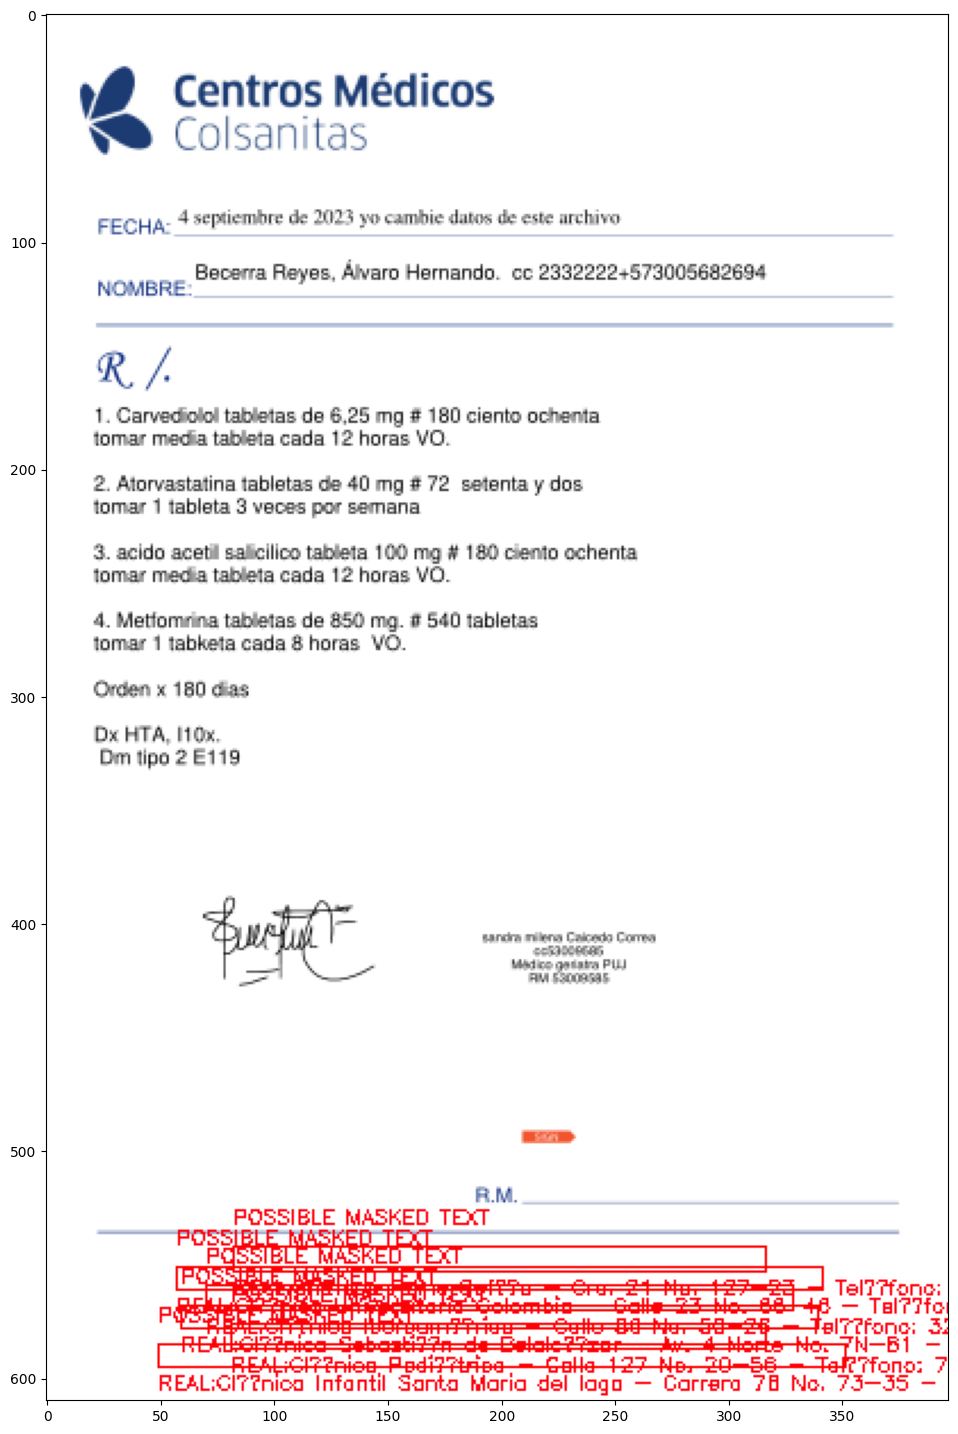

In [ ]:
import numpy as np

#im = cv2.imread('/content/valida_test_3_word_tapada_page1.png')
check = False
for im in rois:
  im2 = im[0].copy()
  imb = cv2.cvtColor(im[0], cv2.COLOR_BGR2GRAY)
  _, image_r = cv2.threshold(imb, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  kernel = np.ones((3, 3), np.uint8)

  img_d = cv2.erode(image_r, kernel, iterations=5) #este parametro se ajusta segun el formato que se quiera revisa 3,4,5
  img_d = cv2.bitwise_not(img_d)
  contours,_ = cv2.findContours(img_d, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    area = cv2.contourArea(cnt)
    (x,y,w,h) = cv2.boundingRect(cnt)
    if area >=4:
      pass
      cv2.rectangle(im[0],(x,y),(x+w, y+h), (0,0,0),-1)
  ex = im[0][:,:,0]
  contours,_ = cv2.findContours(ex, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  #cv2.drawContours(im, contours, 0, (255,0,0),3)
  for cnt in contours:
    area = cv2.contourArea(cnt)
    (x,y,w,h) = cv2.boundingRect(cnt)
    if area >=6:
      print(area,im[0].shape)
      check = True
      cv2.rectangle(im2,(x,y),(x+w, y+h), (255,5,0),-1)
      cv2.putText(img2, "POSSIBLE MASKED TEXT",(int(im[1][0][0]) + x, int(im[1][0][1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,0,12), 1)
      cv2.putText(img2, "REAL:"+im[1][1],(int(im[1][0][0]), int(im[1][0][3]+10)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,0,12), 1)
      #cv2.rectangle(img2, (int(im[1][0][0]), int(im[1][0][1])), (int(im[1][0][2]) , int(im[1][0][3])), (0,0,0), 3)
      cv2.rectangle(img2, (int(im[1][0][0] + x), int(im[1][0][1])), (int(im[1][0][0] + x + w) , int(im[1][0][3])), (255,0,0), 1)
      plt.figure(figsize=(6,4))
      plt.imshow(im2,cmap ='gray')
      plt.show()
if check:
  print("WARNING")
else:
  print("MASKED TEXT NO DETECTED")
plt.figure(figsize=(20,18))
plt.imshow(img2,cmap ='gray')
plt.show()
